# Assignment 3

Welcome to assignment #3! In this assignment, we will continue with exploratory data analysis (EDA) using pandas, examine correlations, and conduct a linear regression.

We've been working with pandas and python for a while now. This assignment is intended to be relatively straightforward. However, it is always possible that you run into problems. Part of this assignment is about seeing how you deal with problems. 

If you do get stuck on a coding problem, you should abstract your problem before you ask the TAs or professor. (For example, we will gladly help you learn how to run a regression, but we will not help run the regression listed in this assignment.) Instead, you should show your problem example using the car data file. (You can download it from https://busan302.mycourses.work/data/mtcars.csv) Make up a small example using that data, to reproduce the error you are getting.

In other words, you can ask the TAs for help on specific technical issues but not for answers to problems. Also, "Is this right?" is not an acceptable use of TA or professor time. At third year level you should be able to read a question written in plain English without needing excessive clarification.

**DO NOT POST YOUR ATTEMPTED ANSWERS TO PIAZZA.** This happened so much for Assignment 2 that as an exercise it is virtually meaningless. I don't want this to happen again.

**Note: You need to answer all questions in complete sentences. Failure to do so will result in part or zero marks.**

Before you start, I'd like you to watch the following video. This video is an excellent review of  topics we'll cover in this assignment.


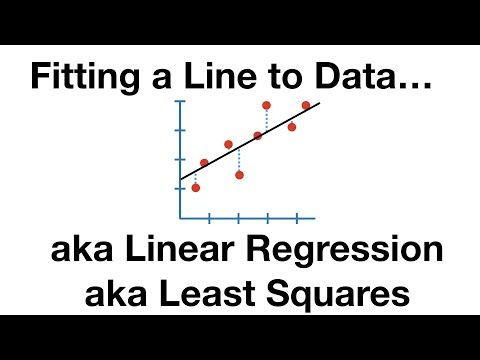

In [39]:
from IPython.display import YouTubeVideo
YouTubeVideo("PaFPbb66DxQ")

# Let's look again at house price data!


## Data dictionary
Here are brief explanations of our variables. You will **rarely** have a detailed dictionary in any organization. This means that your initial explorations of the data are absolutely crucial so that you can understand your data!

In [30]:
from IPython.display import IFrame
IFrame(src='https://busan302.mycourses.work/data/house_price_data_description_short.html', width=800, height=300)

## Download and do some data manipulation

In [31]:
import pandas as pd
df = pd.read_csv("https://busan302.mycourses.work/data/house_price_train.csv") # Use this for the assignment!
#df = pd.read_csv("https://busan302.mycourses.work/data/mtcars.csv") # Use this to ask a question by making a separate example in another workbook.

## Questions: EDA, Correlations and Regression

In the questions that follow, we're going to further explore the relationship between SalePrice and other explanatory variables.

**In addition to LotFrontage, choose two other variables from the data frame you think are promising explanatory variables. Use these variables in the questions below.**

---
>### Q1. Is exploratory data analysis the same thing as hypothesis testing. Explain your reasoning. (1 mark)


A1. No, exploratory data analysis(EDA) is an open-ended analysis in the process of transforming, visualising and summarising data while hypothesis testing is used to verify a priori hypotheses whether some observation seems unusual based on data.

---
>### Q2. Show a correlation matrix for SalePrice and the **explanatory** variables you chose.

(a) Explain in plain English what correlation means. 

(b) Plot and describe the variables with the highest correlation. 

(2 marks)

A2(a) Correlation is the relation of being correlated that two variables are linearly related, such as height and weight.

           SalePrice   LotArea  YearBuilt
SalePrice   1.000000  0.263843   0.522897
LotArea     0.263843  1.000000   0.014228
YearBuilt   0.522897  0.014228   1.000000



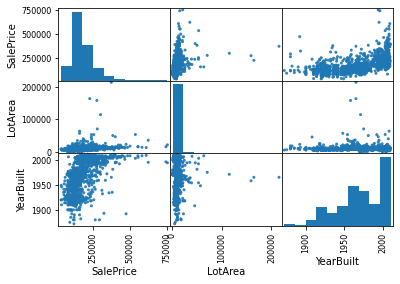

In [32]:
# A2(b)
correlation = df[["SalePrice", "LotArea", "YearBuilt"]]
#correlation.head()

##find the highest correlation.
print(correlation.corr())
print() #new line between values and plot

#Plot
from pandas.plotting import scatter_matrix
correlated_plot = scatter_matrix(correlation, alpha = .9, diagonal = 'hist')


- The histogram plot shows the relationship between two variables in a data set and describes the correlation between two variables. The correlation variable contains SalePrice, LotArea, and YearBuilt, which extracted descriptive names in a data frame. The relationship between SalePrice and yearBuilt shows the highest correlation, approximately 0.523.

---

>### Q3. Run a linear regression model using your explanatory variables and print the results. Interpret each coefficient for each explanatory variable in your model. (2 marks)

In [33]:
import statsmodels.formula.api as smf
model = smf.ols(formula="SalePrice ~ LotArea + YearBuilt" , data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     373.9
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          8.54e-132
Time:                        06:08:46   Log-Likelihood:                -18242.
No. Observations:                1460   AIC:                         3.649e+04
Df Residuals:                    1457   BIC:                         3.651e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.533e+06    1.1e+05    -22.935      0.0

---

>### Q4. If your main goal in regression is inference (i.e., better understanding the relationship between your X variables and y) do you need to be concerned about correlation between variables? Does this change if your goal is prediction? Explain your reasoning. (2 marks)

- Suppose the primary goal in regression is inference. In that case, we need to consider the relationship between your X variables and Y. Because the explanatory variable always belongs on the X-axis, the response variable belongs Y-axis. Although the main goal is prediction, two variables constantly change as long as correlated variables.


---

You notice that LotFrontage has a lot of missing values, and you're curious if there is a relationship with SalePrice. You think that maybe you should not worry about dropping all the rows with NAs, but you want to be sure of your decision.

>### Q5(a) How can you establish that there is no difference between SalePrice in rows with missing values compared with those without missing values? Explain your reasoning and show your code. (3 marks)  


- As the code is shown below, "pd.isnull()" function is to identify whether the "NA" value includes in the column. The new "missing_values" column shows whether the "NA" value is included in the "SalePrice" column. If the outcome is False, there is no "NA" value, while True consists of the "NA" value. Therefore, there is no difference between "SalePrice" in rows with "missing_values".

In [34]:
# Enter your code below - Explain what you're doing.
import scipy.stats

# This may be useful to you.
# Create a dummy variable to identify missing values.
df["missing"] = pd.isnull( df["LotFrontage"] ) 

#We can check whether the "NA" value includes in the LotFrontage column.
check_for_nan = df["LotFrontage"].isnull().values.any()
print("Is there 'NA' value in the LotFrontage column?", check_for_nan)
print()

#We can calculate the number of "NA" value
number_of_na = df["LotFrontage"].isnull().values.sum()
print("How many 'NA' values include in the LotFrontage column?", number_of_na)
print()

#It shows "missing" that twenty rows whether the "NA" value includes in the LotFrontage column. If the outcome is False, there is no "NA" value, while True consists of the "NA" value.
print(df["missing"].head(20))
print()


# Your solution
# Create a dummy variable to identify missing values.
df["missing_values"] = pd.isnull(df["SalePrice"])

#We can check whether the "NA" value includes in the SalePrice column.
check_for_nan2 = df["SalePrice"].isnull().values.any()
print("Is there 'NA' value in the SalePrice column?", check_for_nan2)
print()

#We can calculate the number of "NA" value
number_of_na2 = df["SalePrice"].isnull().values.sum()
print("How many 'NA' values include in the SalePrice column?", number_of_na2)
print()

#It shows "missing_values" that twenty rows whether the "NA" value includes in the SalePrice column. If the outcome is False, there is no "NA" value, while True consists of the "NA" value.
print(df["missing_values"].head(20))
print()




Is there 'NA' value in the LotFrontage column? True

How many 'NA' values include in the LotFrontage column? 259

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12     True
13    False
14     True
15    False
16     True
17    False
18    False
19    False
Name: missing, dtype: bool

Is there 'NA' value in the SalePrice column? False

How many 'NA' values include in the SalePrice column? 0

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: missing_values, dtype: bool



---

>### Q5(b). Explain the null hypothesis and how it relates to the alternative hypothesis in the context of the previous question. Define a p-value and then explain what relation this has to the null and alternative. (3 marks)

- The null hypothesis is the formal basis for the statistical testing hypothesis that proposes that no statistical significance exists in a set of given observations. The null hypothesis and alternative hypothesis are being used in hypothesis testing. The null hypothesis predicts whether there is no effect or no relationship between the variables. In contrast, the alternative hypothesis claims that there is an effect or a relationship in research prediction. There was no relationship between the movement of the two variables.
The P-value shows 0.000 that the null hypothesis is rejected and the test is statistically significant. Therefore, the alternative hypothesis predicts that there is an effect or a relationship in the variables.


---

>### Q5(c) Instead of SalePrice, repeat your analysis in part (a) on one of your other explanatory variables. Explain the results. (2 marks)

- The code below shows no missing value in the YearBuilt column.

In [35]:
# ANSWER
import scipy.stats
import numpy as np

sdf = df[["SalePrice", "LotArea", "YearBuilt"]]  # ANSWER

# Create a dummy variable to identify missing values.
sdf["missing"] = pd.isnull(sdf["YearBuilt"])

#It shows "missing" that twenty rows whether the "NA" value includes in the YearBuilt column. If the outcome is False, there is no "NA" value, while True consists of the "NA" value.
print(sdf["missing"].head(20))
print()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: missing, dtype: bool



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


---

>### Q6. Impute the missing variables using the template code below. Then rerun your regression model. What differences do you notice? Are the coefficients estimated by the models the same or different? Why? Explain your reasoning. (2 marks)

- The regression results show no differences in outcome, and the coefficients estimated by the models remain the same because there was no missing value, so nothing was imputed.

In [37]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='mean') # impute the average for the values
idf = pd.DataFrame(imp.fit_transform(sdf))
idf.columns=sdf.columns
idf.index=sdf.index


In [38]:
import statsmodels.formula.api as smf
model2 = smf.ols(formula="SalePrice ~ LotArea + YearBuilt" , data = df)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     373.9
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          8.54e-132
Time:                        06:09:20   Log-Likelihood:                -18242.
No. Observations:                1460   AIC:                         3.649e+04
Df Residuals:                    1457   BIC:                         3.651e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.533e+06    1.1e+05    -22.935      0.0